In [50]:
import pandas as pd

df = pd.read_csv('data/perfumes.csv')

In [51]:
df.head(2)

,Unnamed: 0,name,brand,year,collection,flakon_designer,perfumer,top_notes,middle_notes,base_notes,...,Harzig,Rauchig,Erdig,Animalisch,Fougère,Chypre,durability,sillage,bottle,scent
0,0,Remix Cologne Anniversary Edition,4711,2017.0,NaN,NaN,Alexandra Kalle,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,1,Solarissimo - Levanzo,Azzaro,2016.0,NaN,NaN,NaN,"['italienische Zitrone', 'Passionsfrucht']","['Lavendel', 'Basilikum']","['Zedernholz', 'Patchouli']",...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [6]:
liste = list(df.columns)
liste

['Unnamed: 0',
 'name',
 'brand',
 'year',
 'collection',
 'flakon_designer',
 'perfumer',
 'top_notes',
 'middle_notes',
 'base_notes',
 'all_notes',
 'url',
 'Duft.rating',
 'Duft.number_of_ratings',
 'Haltbarkeit.rating',
 'Haltbarkeit.number_of_ratings',
 'Sillage.rating',
 'Sillage.number_of_ratings',
 'Flakon.rating',
 'Flakon.number_of_ratings',
 'Preis-Leistungs-Verhältnis.rating',
 'Preis-Leistungs-Verhältnis.number_of_ratings',
 'scent.0',
 'scent.1',
 'scent.2',
 'scent.3',
 'scent.4',
 'scent.5',
 'scent.6',
 'scent.7',
 'scent.8',
 'scent.9',
 'scent.10',
 'durability.0',
 'durability.1',
 'durability.2',
 'durability.3',
 'durability.4',
 'durability.5',
 'durability.6',
 'durability.7',
 'durability.8',
 'durability.9',
 'durability.10',
 'sillage.0',
 'sillage.1',
 'sillage.2',
 'sillage.3',
 'sillage.4',
 'sillage.5',
 'sillage.6',
 'sillage.7',
 'sillage.8',
 'sillage.9',
 'sillage.10',
 'bottle.0',
 'bottle.1',
 'bottle.2',
 'bottle.3',
 'bottle.4',
 'bottle.5',
 'bo

In [7]:
# Step 1: Sort by a specific column (e.g., 'score' descending)
df = df.sort_values(by='Duft.number_of_ratings', ascending=False)

# Step 2: Assign a unique ID (starting from 1)
df['unique_id'] = range(1, len(df) + 1)

# Reset index if needed (optional)
df = df.reset_index(drop=True)

In [11]:
df = df.drop_duplicates(subset=['brand', 'name', 'Duft.number_of_ratings'])

In [12]:
df[['unique_id', 'brand', 'name', 'Duft.number_of_ratings']].head(10)

,unique_id,brand,name,Duft.number_of_ratings
0,1,XerJoff,Naxos,9416.0
1,2,Dior,Dior Homme Intense,6781.0
2,3,Parfums de Marly,Layton,6768.0
3,4,Creed,Aventus,6767.0
4,5,Prada,L'Homme,5852.0
6,7,Louis Vuitton,Imagination,5813.0
7,8,Tom Ford,Oud Wood Tom Ford 2007 Eau de Parfum,5444.0
9,10,Dior,Sauvage Dior 2015 Eau de Toilette,5433.0
10,11,XerJoff,Erba Pura,5323.0
11,12,Viktor Rolf,Spicebomb Extreme,5067.0


In [16]:
df = df.drop(columns=['Unnamed: 0'])

In [17]:
df = df[['unique_id'] + [col for col in df.columns if col != 'unique_id']]

In [18]:
df.to_csv('sorted_perfumes.csv')

In [1]:
import pandas as pd

price_df = pd.read_csv('idealo_prices/idealo_scraper/perfume_checkpoints/checkpoint.csv')

In [2]:
price_df.head()

,Unnamed: 0,unique_id,name,brand,year,collection,flakon_designer,perfumer,top_notes,middle_notes,...,Rauchig,Erdig,Animalisch,Fougère,Chypre,durability,sillage,bottle,scent,sizes_and_prices
0,0,1,Naxos,XerJoff,2015.0,1861,NaN,NaN,"['Lavendel', 'Bergamotte', 'Zitrone']","['Honig', 'Jasmin-Sambac', 'Kaschmir', 'Zimt']",...,0.00,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,[{'title': 'XerJoff XY 1861 Naxos Eau de Parfu...
1,1,2,Dior Homme Intense,Dior,2011.0,NaN,NaN,François Demachy,['florentinische Schwertlilie Absolue'],['ecuadorianischer Ambrettesamen'],...,0.00,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,[{'title': 'Dior Homme Intense Eau de Parfum (...
2,2,3,Layton,Parfums de Marly,2016.0,Masculine Signature Collection,NaN,Hamid Merati-Kashani,"['Apfel', 'Lavendel', 'Bergamotte', 'Mandarine']","['Jasmin', 'Rosengeranie', 'Veilchen']",...,0.00,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,[{'title': 'Parfums de Marly Layton Eau de Par...
3,3,4,Aventus,Creed,2010.0,NaN,NaN,Jean-Christophe Hérault,"['Bergamotte', 'Apfel', 'rosa Pfeffer', 'Schwa...","['Ananas', 'indonesisches Patchouli', 'Jasmin']",...,12.46,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,[{'title': 'Creed Aventus Eau de Parfum (100ml...
4,4,5,L'Homme,Prada,2016.0,NaN,NaN,Daniela Andrier,NaN,NaN,...,0.00,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,"[{'title': ""Prada L'Homme Eau de Toilette"", 'b..."


In [3]:
from rich.console import Console
from rich.table import Table
import ast

console = Console()
table = Table(title="Perfume Prices")

for i, row in price_df.iterrows():
    console.print(f"[bold green]:{row['name']}[/]")  # Bold 
    table = Table(title={row['name']})
    table.add_column("Brand", style="cyan", justify="left")
    # table.add_column("Perfume", style="magenta")
    table.add_column("Bottle Size", style="magenta")
    table.add_column("Price", style="green", justify="right")
    
    sizes_and_prices = ast.literal_eval(row['sizes_and_prices'])

    for element in sizes_and_prices:
        print(type(row['brand']), type(row['name']), type(element['bottle_size']), type(element['price']))
        if element['offers_count']:
            if element['bottle_size']:
                # table.add_row(row['brand'], row['name'], element['bottle_size'], element['price'])
                table.add_row('Test', str(element['bottle_size']), str(element['price']))
    console.print(table)
    if i > 5:
        break

:Naxos

<class 'str'> <class 'str'> <class 'NoneType'> <class 'str'>
<class 'str'> <class 'str'> <class 'str'> <class 'str'>
<class 'str'> <class 'str'> <class 'NoneType'> <class 'str'>
<class 'str'> <class 'str'> <class 'NoneType'> <class 'str'>
<class 'str'> <class 'str'> <class 'NoneType'> <class 'str'>
<class 'str'> <class 'str'> <class 'NoneType'> <class 'str'>
<class 'str'> <class 'str'> <class 'NoneType'> <class 'str'>
<class 'str'> <class 'str'> <class 'NoneType'> <class 'str'>
<class 'str'> <class 'str'> <class 'NoneType'> <class 'str'>


NotRenderableError: Unable to render {'Naxos'}; A str, Segment or object with __rich_console__ method is required

In [4]:
from rich.console import Console

console = Console()

console.print("[bold red]Error:[/] Something went wrong!")  # Bold red
console.print("[green]Success:[/] Everything is okay!")    # Green text
console.print("[underline blue]Link:[/] example.com")      # Underlined blue
console.print("[italic yellow]Warning:[/] Be careful!")    # Italic yellow

Error: Something went wrong!

Success: Everything is okay!

Link: example.com

Warning: Be careful!

In [5]:
for i, row in price_df.iterrows():
    console.print(f"[bold green]:{row['name']}[/]")  # Bold 
    
    sizes_and_prices = ast.literal_eval(row['sizes_and_prices'])
    print(sizes_and_prices)

    for element in sizes_and_prices:
        if element['offers_count']:
            if element['bottle_size']:
                print(row['brand'], row['name'], element['bottle_size'], element['price'])
    if i > 5:
        break

:Naxos

[{'title': 'XerJoff XY 1861 Naxos Eau de Parfum', 'bottle_size': None, 'price': '167,90 €', 'base_price': None, 'offers_count': '34 Angebote', 'image_url': 'https://cdn.idealo.com/folder/Product/202078/4/202078421/s1_produktbild_mittelgross/xerjoff-xy-1861-naxos-eau-de-parfum.jpg', 'product_url': 'https://www.idealo.de/preisvergleich/OffersOfProduct/202078421_-xy-1861-naxos-eau-de-parfum-xerjoff.html', 'description': 'Unisex Eau de Parfum (EDP), würzig'}, {'title': 'XerJoff XY 1861 Naxos Eau de Parfum (100ml)', 'bottle_size': '100 ml', 'price': '167,90 €', 'base_price': '1.679,00 €/Liter', 'offers_count': '34 Angebote', 'image_url': 'https://cdn.idealo.com/folder/Product/5907/2/5907260/s1_produktbild_mittelgross/xerjoff-xy-1861-naxos-eau-de-parfum-100ml.jpg', 'product_url': 'https://www.idealo.de/preisvergleich/OffersOfProduct/5907260_-xy-1861-naxos-eau-de-parfum-100ml-xerjoff.html', 'description': 'Unisex Eau de Parfum (EDP), Inhalt in ml\xa0100\xa0ml, würzig'}, {'title': 'XERJOFF Eau

:Dior Homme Intense

[{'title': 'Dior Homme Intense Eau de Parfum (50ml)', 'bottle_size': '50 ml', 'price': '72,49 €', 'base_price': '1.449,80 €/Liter', 'offers_count': '19 Angebote', 'image_url': 'https://cdn.idealo.com/folder/Product/1032/1/1032133/s1_produktbild_mittelgross/dior-homme-intense-eau-de-parfum-50ml.jpg', 'product_url': 'https://www.idealo.de/preisvergleich/OffersOfProduct/1032133_-homme-intense-eau-de-parfum-50ml-dior.html', 'description': 'Intense Eau de Parfum für Männer, blumig, sinnlich'}, {'title': 'Dior Homme Intense Eau de Parfum (100ml)', 'bottle_size': '100 ml', 'price': '97,94 €', 'base_price': '979,40 €/Liter', 'offers_count': '18 Angebote', 'image_url': 'https://cdn.idealo.com/folder/Product/1266/5/1266570/s1_produktbild_mittelgross/dior-homme-intense-eau-de-parfum-100ml.jpg', 'product_url': 'https://www.idealo.de/preisvergleich/OffersOfProduct/1266570_-homme-intense-eau-de-parfum-100ml-dior.html', 'description': 'Intense Eau de Parfum für Männer, blumig, sinnlich'}, {'title': '

:Layton

[{'title': 'Parfums de Marly Layton Eau de Parfum', 'bottle_size': None, 'price': '115,00 €', 'base_price': None, 'offers_count': '49 Angebote', 'image_url': 'https://cdn.idealo.com/folder/Product/5534/2/5534266/s1_produktbild_mittelgross/parfums-de-marly-layton-eau-de-parfum.jpg', 'product_url': 'https://www.idealo.de/preisvergleich/OffersOfProduct/5534266_-layton-eau-de-parfum-parfums-de-marly.html', 'description': 'Unisex Eau de Parfum (EDP), blumig'}, {'title': 'Parfums de Marly Layton Royal Essence Eau de Parfum (125ml)', 'bottle_size': '125 ml', 'price': '219,95 €', 'base_price': '1.759,60 €/Liter', 'offers_count': '23 Angebote', 'image_url': 'https://cdn.idealo.com/folder/Product/5534/2/5534265/s1_produktbild_mittelgross/parfums-de-marly-layton-royal-essence-eau-de-parfum-125ml.jpg', 'product_url': 'https://www.idealo.de/preisvergleich/OffersOfProduct/5534265_-layton-royal-essence-eau-de-parfum-125ml-parfums-de-marly.html', 'description': 'Unisex Eau de Parfum (EDP), Inhalt in m

:Aventus

[{'title': 'Creed Aventus Eau de Parfum (100ml)', 'bottle_size': '100 ml', 'price': '248,00 €', 'base_price': '2.480,00 €/Liter', 'offers_count': '26 Angebote', 'image_url': 'https://cdn.idealo.com/images/product/5531095/de_DE/0/mittelgross.jpg', 'product_url': 'https://www.idealo.de/preisvergleich/OffersOfProduct/5531095_-aventus-eau-de-parfum-100ml-creed.html', 'description': 'Nischenduft für Männer, Chypre'}, {'title': 'Creed Aventus Eau de Parfum', 'bottle_size': None, 'price': '165,00 €', 'base_price': None, 'offers_count': '46 Angebote', 'image_url': 'https://cdn.idealo.com/images/product/3301680/de_DE/0/mittelgross.jpg', 'product_url': 'https://www.idealo.de/preisvergleich/OffersOfProduct/3301680_-aventus-eau-de-parfum-creed.html', 'description': 'Nischenduft für Männer, Chypre'}, {'title': 'Creed Aventus Eau de Parfum (50ml)', 'bottle_size': '50 ml', 'price': '178,50 €', 'base_price': '3.570,00 €/Liter', 'offers_count': '18 Angebote', 'image_url': 'https://cdn.idealo.com/images

:L'Homme

[{'title': "Prada L'Homme Eau de Toilette", 'bottle_size': None, 'price': '55,17 €', 'base_price': None, 'offers_count': '98 Angebote', 'image_url': 'https://cdn.idealo.com/folder/Product/5091/0/5091087/s1_produktbild_mittelgross/prada-l-homme-eau-de-toilette.jpg', 'product_url': 'https://www.idealo.de/preisvergleich/OffersOfProduct/5091087_-l-homme-eau-de-toilette-prada.html', 'description': 'Eau de Toilette für Männer (EdT), Chypre'}, {'title': "Prada L'Homme Intense Eau de Parfum", 'bottle_size': None, 'price': '79,16 €', 'base_price': None, 'offers_count': '51 Angebote', 'image_url': 'https://cdn.idealo.com/folder/Product/5584/6/5584619/s1_produktbild_mittelgross/prada-l-homme-intense-eau-de-parfum.jpg', 'product_url': 'https://www.idealo.de/preisvergleich/OffersOfProduct/5584619_-l-homme-intense-eau-de-parfum-prada.html', 'description': 'Intense Eau de Parfum für Männer, orientalisch, belebend'}, {'title': "Prada L'Homme Eau de Toilette (100ml)", 'bottle_size': '100 ml', 'price': 

:Imagination

[{'title': 'Cassina - Modular Imagination Element - 45 x 45 cm, rechteckig (230_01) (602) 45 x 45 cm', 'bottle_size': None, 'price': '1.626,00 €', 'base_price': None, 'offers_count': None, 'image_url': 'https://cdn.idealo.com/offer/de/cassina-modular-imagination-element-45-x-45-cm-rechteckig-230_01-602-45-x-45-cm-168t140f61d3eaea4e481474fb31d88c16967ea5e293052.jpg', 'product_url': None, 'description': ''}, {'title': 'Cassina - Modular Imagination Element - 78 x 45 cm, rechteckig (230_02) (603) 78 x 45 cm', 'bottle_size': None, 'price': '2.538,00 €', 'base_price': None, 'offers_count': None, 'image_url': 'https://cdn.idealo.com/offer/de/cassina-modular-imagination-element-78-x-45-cm-rechteckig-230_02-603-78-x-45-cm-168t1400b0d7cf3e6e7df93ff3db7439423e46c67383092.jpg', 'product_url': None, 'description': ''}]


:Oud Wood Tom Ford 2007 Eau de Parfum

[{'title': 'Tom Ford Oud Wood Eau de Parfum', 'bottle_size': None, 'price': '53,80 €', 'base_price': None, 'offers_count': '110 Angebote', 'image_url': 'https://cdn.idealo.com/folder/Product/4677/4/4677477/s1_produktbild_mittelgross/tom-ford-oud-wood-eau-de-parfum.jpg', 'product_url': 'https://www.idealo.de/preisvergleich/OffersOfProduct/4677477_-oud-wood-eau-de-parfum-tom-ford.html', 'description': 'Unisex Eau de Parfum (EDP), orientalisch'}, {'title': 'Tom Ford Oud Wood Eau de Parfum (100 ml)', 'bottle_size': '100 ml', 'price': '212,75 €', 'base_price': '2.127,50 €/Liter', 'offers_count': '31 Angebote', 'image_url': 'https://cdn.idealo.com/folder/Product/4403/0/4403042/s1_produktbild_mittelgross/tom-ford-oud-wood-eau-de-parfum-100-ml.jpg', 'product_url': 'https://www.idealo.de/preisvergleich/OffersOfProduct/4403042_-oud-wood-eau-de-parfum-100-ml-tom-ford.html', 'description': 'Unisex Eau de Parfum (EDP), Inhalt in ml\xa0100\xa0ml, orientalisch'}, {'title': 'Tom Ford Oud Wood Eau de P

In [6]:
import json

for i, row in price_df.iterrows():

    data = ast.literal_eval(row['sizes_and_prices'])
    break

# Cleaning function
for item in data:
    for key, value in item.items():
        if value is None:
            item[key] = ""  # Replace None with empty string
        elif isinstance(value, str):
            item[key] = value.replace("\xa0", " ")  # Replace non-breaking spaces

# Pretty-print cleaned JSON
print(json.dumps(data, indent=4, ensure_ascii=False))

[
    {
        "title": "XerJoff XY 1861 Naxos Eau de Parfum",
        "bottle_size": "",
        "price": "167,90 €",
        "base_price": "",
        "offers_count": "34 Angebote",
        "image_url": "https://cdn.idealo.com/folder/Product/202078/4/202078421/s1_produktbild_mittelgross/xerjoff-xy-1861-naxos-eau-de-parfum.jpg",
        "product_url": "https://www.idealo.de/preisvergleich/OffersOfProduct/202078421_-xy-1861-naxos-eau-de-parfum-xerjoff.html",
        "description": "Unisex Eau de Parfum (EDP), würzig"
    },
    {
        "title": "XerJoff XY 1861 Naxos Eau de Parfum (100ml)",
        "bottle_size": "100 ml",
        "price": "167,90 €",
        "base_price": "1.679,00 €/Liter",
        "offers_count": "34 Angebote",
        "image_url": "https://cdn.idealo.com/folder/Product/5907/2/5907260/s1_produktbild_mittelgross/xerjoff-xy-1861-naxos-eau-de-parfum-100ml.jpg",
        "product_url": "https://www.idealo.de/preisvergleich/OffersOfProduct/5907260_-xy-1861-naxos-eau-de

In [11]:
import pandas as pd
import ast
import numpy as np

def create_perfume_price_df(price_df):
    # Create an empty list to store the transformed data
    perfume_data = []
    
    # Iterate through the original dataframe
    for i, row in price_df.iterrows():
        brand = row['brand']
        name = row['name']
        
        # Initialize a dictionary for this perfume
        perfume_entry = {
            'brand': brand,
            'perfume_name': name
        }
        
        # Check if sizes_and_prices is NaN or None
        if pd.isna(row['sizes_and_prices']) or row['sizes_and_prices'] is None:
            # Skip this row or add it with empty price columns
            continue
        
        try:
            # Parse the sizes and prices string into a list of dictionaries
            sizes_and_prices = ast.literal_eval(row['sizes_and_prices'])
            
            # Track bottle sizes we've already seen for this perfume
            seen_bottle_sizes = set()
            
            # Extract bottle sizes and prices
            for element in sizes_and_prices:
                # Only process items with offers_count and bottle_size
                if element.get('offers_count') and element.get('bottle_size'):
                    bottle_size = element['bottle_size']
                    price = element['price']
                    
                    # Only add this bottle size if we haven't seen it before
                    if bottle_size not in seen_bottle_sizes:
                        seen_bottle_sizes.add(bottle_size)
                        
                        # Create a column name based on bottle size (e.g., 'price_100ml')
                        column_name = f'price_{bottle_size.replace(" ", "")}'
                        perfume_entry[column_name] = price
            
            # Only add entries that have at least one bottle size
            if len(perfume_entry) > 2:  # More than just brand and perfume_name
                perfume_data.append(perfume_entry)
                
        except (ValueError, SyntaxError) as e:
            print(f"Error processing row {i} ({brand} - {name}): {e}")
            continue
    
    # Create the dataframe
    result_df = pd.DataFrame(perfume_data)
    
    return result_df

In [12]:
result_df = create_perfume_price_df(price_df)
result_df

,brand,perfume_name,price_100ml,price_50ml,price_150ml,price_125ml,price_75ml,price_200ml,price_30ml,price_10ml,...,price_600ml,price_24ml,price_245ml,price_44ml,price_9ml,price_74ml,price_32ml,price_2ml,price_450ml,price_700ml
0,XerJoff,Naxos,"167,90 €",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Dior,Dior Homme Intense,"97,94 €","72,49 €","113,94 €",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Parfums de Marly,Layton,NaN,NaN,NaN,"219,95 €","188,99 €","359,99 €","115,00 €",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Creed,Aventus,"248,00 €","178,50 €",NaN,NaN,"260,10 €",NaN,"165,00 €",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Prada,L'Homme,"74,99 €","55,17 €","87,43 €",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6141,Daniel Josier,Vetiver,"11,99 €","24,99 €",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6142,Valentino,Valentino Donna Born In Roma Extradose,"122,95 €","107,95 €",NaN,NaN,NaN,NaN,"75,95 €",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6143,Alyssa Ashley,Essence de Patchouli Alyssa Ashley 2009 Eau de...,"32,87 €","23,44 €",NaN,NaN,NaN,NaN,"9,35 €",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6144,Clive Christian,1872 Basil,"463,03 €","181,91 €",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
result_df.columns = result_df.columns.str.strip()

# Count non-NaN values per column
column_counts = result_df.notna().sum()

# Sort columns based on count of non-NaN values
sorted_columns = column_counts.sort_values(ascending=False).index

# Reorder DataFrame with sorted columns
df_sorted = result_df[sorted_columns]
print(df_sorted)

                 brand                                       perfume_name  \
0              XerJoff                                              Naxos   
1                 Dior                                 Dior Homme Intense   
2     Parfums de Marly                                             Layton   
3                Creed                                            Aventus   
4                Prada                                            L'Homme   
...                ...                                                ...   
6141     Daniel Josier                                            Vetiver   
6142         Valentino             Valentino Donna Born In Roma Extradose   
6143     Alyssa Ashley  Essence de Patchouli Alyssa Ashley 2009 Eau de...   
6144   Clive Christian                                         1872 Basil   
6145          Bohoboco                                Yellow Rose Incense   

     price_100ml price_50ml price_30ml price_75ml price_200ml price_125ml  

In [35]:
# Function to clean and filter prices
def convert_price(price_series):
    return (
        price_series.astype(str)
        .str.replace("€", "", regex=False)
        .str.replace(".", "", regex=False)
        .str.replace(",", ".", regex=False)
        .str.strip()
        .astype(float)
    )

# Convert price columns
price_100ml = convert_price(result_df['price_100ml'].dropna())
price_50ml = convert_price(result_df['price_50ml'].dropna())
price_150ml = convert_price(result_df['price_150ml'].dropna())

# Drop outliers (assuming 3025.0 is the max outlier)
price_100ml = price_100ml[price_100ml < 3025.0]
price_50ml = price_50ml[price_50ml < 3025.0]
price_150ml = price_150ml[price_150ml < 3025.0]

In [36]:
max(price_100ml)

1187.06

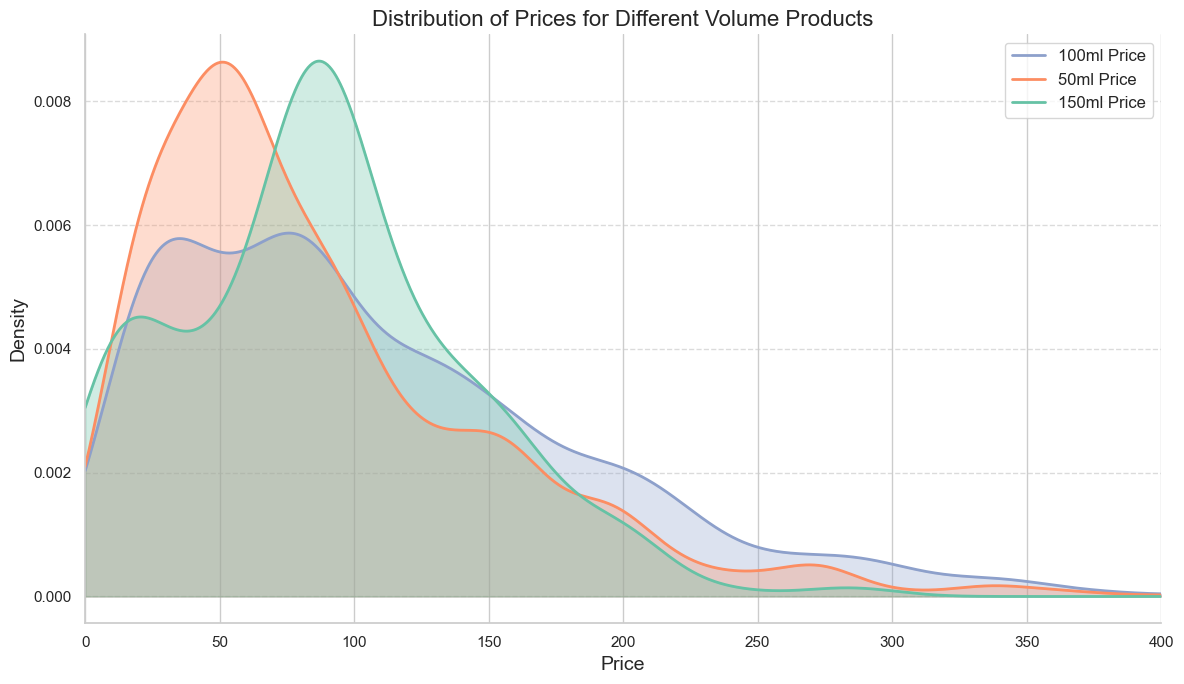

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# First, ensure the data is numeric
# Convert to numeric if needed, removing any non-numeric values
def convert_to_numeric(data):
    try:
        return pd.to_numeric(data, errors='coerce').dropna().values
    except:
        return np.array([float(x) for x in data if str(x).replace('.', '', 1).isdigit()])

# Convert the data
price_100ml_num = convert_to_numeric(price_100ml)
price_50ml_num = convert_to_numeric(price_50ml)
price_150ml_num = convert_to_numeric(price_150ml)

# Create the figure
plt.figure(figsize=(12, 7))

# Define the fixed x range (0 to 400)
x_min = 0
x_max = 400
x = np.linspace(x_min, x_max, 1000)

# Calculate density for each dataset
kde_100ml = stats.gaussian_kde(price_100ml_num)
kde_50ml = stats.gaussian_kde(price_50ml_num)
kde_150ml = stats.gaussian_kde(price_150ml_num)

# Plot the density curves
plt.plot(x, kde_100ml(x), color='#8da0cb', linewidth=2, label='100ml Price')
plt.fill_between(x, kde_100ml(x), alpha=0.3, color='#8da0cb')

plt.plot(x, kde_50ml(x), color='#fc8d62', linewidth=2, label='50ml Price')
plt.fill_between(x, kde_50ml(x), alpha=0.3, color='#fc8d62')

plt.plot(x, kde_150ml(x), color='#66c2a5', linewidth=2, label='150ml Price')
plt.fill_between(x, kde_150ml(x), alpha=0.3, color='#66c2a5')

# Set the x-axis limits explicitly
plt.xlim(x_min, x_max)

# Add a grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels and title
plt.xlabel("Price", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.title("Distribution of Prices for Different Volume Products", fontsize=16)
plt.legend(fontsize=12)

# Remove top and right spines for a cleaner look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Display the plot
plt.tight_layout()
plt.show()

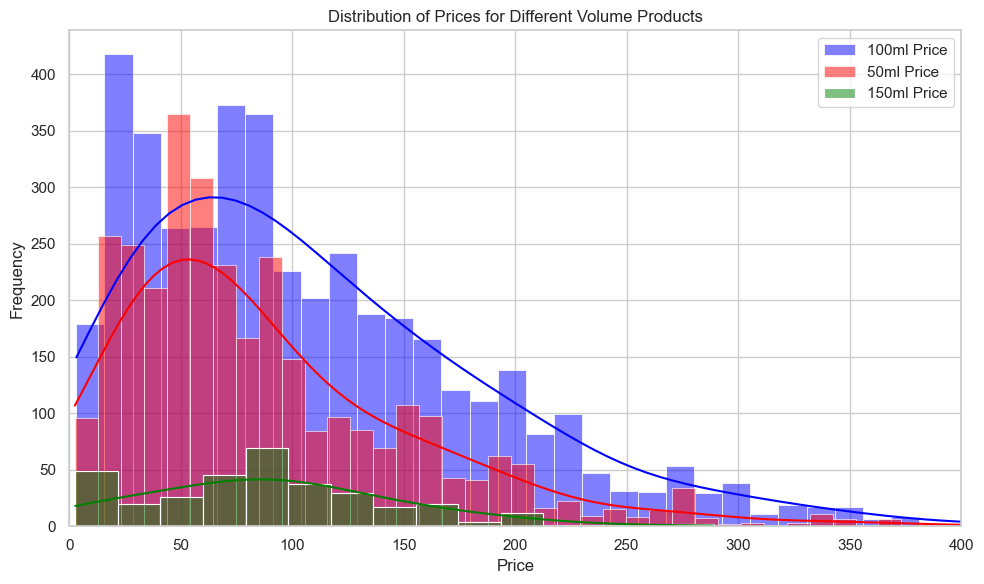

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Setting the aesthetic style of the plots
sns.set_theme(style="whitegrid")

# Creating the figure and axis
plt.figure(figsize=(10, 6))

kde_kws={"bw_adjust": 2.0}
# Using alpha to make the histograms transparent so all are visible
sns.histplot(price_100ml, kde=True, color="blue", label="100ml Price", alpha=0.5, kde_kws=kde_kws)
sns.histplot(price_50ml, kde=True, color="red", label="50ml Price", alpha=0.5, kde_kws=kde_kws)
sns.histplot(price_150ml, kde=True, color="green", label="150ml Price", alpha=0.5, kde_kws=kde_kws)

# Adding labels and title
plt.xlabel("Price")
# Set the x-axis limits explicitly
plt.xlim(0, 400)
plt.ylabel("Frequency")
plt.title("Distribution of Prices for Different Volume Products")
plt.legend()

# Optional: Adjust the x-axis limit if needed
# plt.xlim(0, max_price_value)

# Show the plot
plt.tight_layout()
plt.show()

In [47]:
old = pd.read_pickle('data/old_database.pkl')

In [48]:
old

,Name,Designer,Year,Haltbarkeit,Duft,Sillage,Preis_Leistungs_Verhaeltnis,Parfumo_Link,Designer_Link,Fragrantica_Link,...,earthy,almond,animalic,fresh,soft_spicy,honey,green,woody,powdery,cacao
0,:,A & E - Ariana & Evans,NaN,NaN,NaN,NaN,NaN,https://www.parfumo.de/Parfums/A__E__Ariana__E...,A__E__Ariana__Evans,None,...,None,None,None,None,None,None,None,None,None,None
1,The Undersea,A & E - Ariana & Evans,NaN,NaN,NaN,NaN,NaN,https://www.parfumo.de/Parfums/A__E__Ariana__E...,A__E__Ariana__Evans,None,...,None,None,None,None,None,None,None,None,None,None
2,Forbidden Fruit,A & E - Ariana & Evans,NaN,NaN,NaN,NaN,NaN,https://www.parfumo.de/Parfums/A__E__Ariana__E...,A__E__Ariana__Evans,None,...,None,None,None,None,None,None,None,None,None,None
3,Choco Cubano,A & E - Ariana & Evans,NaN,NaN,NaN,NaN,NaN,https://www.parfumo.de/Parfums/A__E__Ariana__E...,A__E__Ariana__Evans,None,...,None,None,None,None,None,None,None,None,None,None
4,Chasing the Dragon,A & E - Ariana & Evans,NaN,NaN,NaN,NaN,NaN,https://www.parfumo.de/Parfums/A__E__Ariana__E...,A__E__Ariana__Evans,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142636,Rosso,Zync,NaN,NaN,NaN,NaN,NaN,https://www.parfumo.de/Parfums/Zync/Rosso,Zync,None,...,None,None,None,None,None,None,None,None,None,None
142637,Charge,Zync,2015.0,NaN,NaN,NaN,NaN,https://www.parfumo.de/Parfums/Zync/Charge,Zync,None,...,None,None,None,None,None,None,None,None,None,None
142638,Lusty Move,Zync,NaN,6.5,5.2,6.1,NaN,https://www.parfumo.de/Parfums/Zync/Lusty_Move,Zync,None,...,None,None,None,None,None,None,None,None,None,None
142639,Aqua Sport,Zync,2015.0,NaN,NaN,NaN,NaN,https://www.parfumo.de/Parfums/Zync/Aqua_Sport,Zync,None,...,None,None,None,None,None,None,None,None,None,None


In [52]:
df.head()

,Unnamed: 0,name,brand,year,collection,flakon_designer,perfumer,top_notes,middle_notes,base_notes,...,Harzig,Rauchig,Erdig,Animalisch,Fougère,Chypre,durability,sillage,bottle,scent
0,0,Remix Cologne Anniversary Edition,4711,2017.0,NaN,NaN,Alexandra Kalle,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,1,Solarissimo - Levanzo,Azzaro,2016.0,NaN,NaN,NaN,"['italienische Zitrone', 'Passionsfrucht']","['Lavendel', 'Basilikum']","['Zedernholz', 'Patchouli']",...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,2,A*Men Ultra Zest,Mugler,2015.0,NaN,NaN,Jacques Huclier,"['Blutorange', 'Tangerine', 'Ingwer', 'Minze']","['Kaffee', 'Zimt', 'schwarzer Pfeffer']","['Patchouli', 'Vanille', 'Tonkabohne']",...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,3,Acqua Nobile Rosa,Acqua di Parma,2015.0,NaN,NaN,NaN,"['italienische Bergamotte', 'italienische Mand...","['Damaszener-Rose', 'italienische Zentifolie',...","['Moschus', 'Ambra']",...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,4,Minuit et Demi,Fragrance Du Bois,2021.0,NaN,NaN,Stéphane Bengana,"['Kardamom', 'Piment', 'Bergamotte']","['Karamell', 'Kaffee']","['Cashmeran', 'Moschus', 'Vanille', 'Vetiver',...",...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
